# Installation and Setup

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Preprocessing

In [ ]:
#importing the dataset
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
class_names=['airplane', 
'automobile', 
'bird',
'cat', 
'deer', 
'dog', 
'frog', 
'horse' ,
'ship', 
'truck']
print(class_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
#range of x_train
print(x_train.max())
print(x_train.min())

255
0


In [ ]:
#range of y_train
print(y_train.max())
print(y_train.min())

9
0


In [ ]:
#normalize the images
x_train=x_train/255.0
x_test=x_test/255.0

In [ ]:
#range of x_train AFTER normalizing
print(x_train.max())
print(x_train.min())

1.0
0.0


In [ ]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

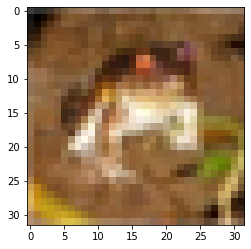

In [ ]:
plt.imshow(x_train[0])

In [ ]:
#show result image
class_names[y_train[0][0]]

'frog'

# Building CNN Model

In [ ]:
#defining the object i
model=tf.keras.models.Sequential()

In [ ]:
#Adding first Convolutional layer
# parameters:
#1) filters (kernal)  = 32 [while be able to detect 32 diff edges/features]
#2) kernal size = 3 or (3,3) [filter size]
#3) padding = same [same padding adds column of zeros and preserves info, valid padding loses info]
#4)activation=relu
#5)input shape = (32,32,3)

model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[32,32,3]))

In [ ]:
#adding second CNN layer and MaxPool Layer
# parameters:
#1) filters (kernal)  = 32
#2) kernal size = 3
#3) padding = same [same padding adds column of zeros and preserves info, valid padding loses info]
#4)activation=relu
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))

#maxpool layer parameters:
#1)pool size = 2 [size of filter]
#2)strides = 2 [by how many units the filter moves]
#3)padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [ ]:
#adding third CNN layer
# parameters:
#1) filters (kernal)  = 64
#2) kernal size = 3
#3) padding = same 
#4)activation=relu
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))


In [ ]:
#adding fourth CNN layer and MaxPool Layer
# parameters:
#1) filters (kernal)  = 64
#2) kernal size = 3
#3) padding = same [same padding adds column of zeros and preserves info, valid padding loses info]
#4)activation=relu
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))

#maxpool layer parameters:
#1)pool size = 2
#2)strides = 2
#3)padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [ ]:
#adding dropout layer
model.add(tf.keras.layers.Dropout(0.4))

In [ ]:
#Adding Flattening layer (converting array to vector)
model.add(tf.keras.layers.Flatten())

In [ ]:
#Adding first dense layer
model.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [ ]:
#Adding second dense layer - output
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0

# Training the Model

In [ ]:
#compiling the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [ ]:
model.fit(x_train,y_train,batch_size=32, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 224s 143ms/step - loss: 1.6482 - sparse_categorical_accuracy: 0.3935
Epoch 2/10
1563/1563 [==============================] - 228s 146ms/step - loss: 1.0184 - sparse_categorical_accuracy: 0.6387
Epoch 3/10
1563/1563 [==============================] - 223s 143ms/step - loss: 0.8303 - sparse_categorical_accuracy: 0.7074
Epoch 4/10
1563/1563 [==============================] - 225s 144ms/step - loss: 0.7310 - sparse_categorical_accuracy: 0.7406
Epoch 5/10
1563/1563 [==============================] - 226s 144ms/step - loss: 0.6664 - sparse_categorical_accuracy: 0.7662
Epoch 6/10
1563/1563 [==============================] - 225s 144ms/step - loss: 0.5866 - sparse_categorical_accuracy: 0.7951
Epoch 7/10
1563/1563 [==============================] - 228s 146ms/step - loss: 0.5289 - sparse_categorical_accuracy: 0.8096
Epoch 8/10
1563/1563 [==============================] - 227s 145ms/step - loss: 0.4842 - sparse_categorical_accuracy: 0.8306


# Model Evaluation and prediction

In [ ]:
#evaluate model performance
test_loss, test_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 12s 38ms/step - loss: 0.6734 - sparse_categorical_accuracy: 0.7808


In [ ]:
print('Test accuracy is {}'.format(test_acc))

Test accuracy is 0.7807999849319458


In [ ]:
#predicting
y_pred = model.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print('the predicted value is {}'.format(y_pred[13]))
print('the real value is {}'.format(y_test[13][0]))

the predicted value is 7
the real value is 7


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
acc_cm = accuracy_score(y_test,y_pred)
print('accuracy score is {}'.format(acc_cm))

[[784  11  43  21  18  12   6  16  59  30]
 [ 12 863   3   7   2   7   9   2  19  76]
 [ 52   1 631  43  99  68  64  27   9   6]
 [ 11   2  43 581  76 189  53  29  10   6]
 [  7   3  42  48 787  23  39  43   7   1]
 [  7   1  24 104  57 761  13  27   3   3]
 [  3   2  32  50  35  29 835   7   5   2]
 [  5   2  26  26  62  48   3 816   2  10]
 [ 46  16   9  11   3   5   4   5 876  25]
 [ 23  39   7  12   5   8   2  13  17 874]]
accuracy score is 0.7808
